In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [18]:
data = pd.read_csv("kidney_disease.csv")
data.head(5)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no              1  
1  ...   38  6000  NaN   no   no   no  good   no   no              1  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes              1  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes              1  
4  ...   35  7300  4.6   no   no   no  good   no   no              1  

[5 rows x 26 columns]

In [19]:
columns_to_retain = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']

In [20]:
def preprocess_data(data, columns_to_retain):
    data = data.drop([col for col in data.columns if col not in columns_to_retain], axis=1)
    data = data.dropna(axis=0)
    for column in data.columns:
        if data[column].dtype == np.number:
            continue
        data[column] = LabelEncoder().fit_transform(data[column])
    return data

In [21]:
data = preprocess_data(pd.DataFrame(data), columns_to_retain)
data

C:\Users\npuni\AppData\Local\Temp\ipykernel_600\2498250997.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
C:\Users\npuni\AppData\Local\Temp\ipykernel_600\2498250997.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
C:\Users\npuni\AppData\Local\Temp\ipykernel_600\2498250997.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
C:\Users\npuni\AppData\Local\Temp\ipykernel_600\2498250997.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype ==

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv  wc  rc  \
3    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...   11  42  14   
9    53.0  90.0  1.020  2.0  0.0    0   0    1   0   70.0  ...    8  11  12   
11   63.0  70.0  1.010  3.0  0.0    0   0    1   0  380.0  ...   11  25  13   
14   68.0  80.0  1.010  3.0  2.0    1   0    1   1  157.0  ...    0   8   2   
20   61.0  80.0  1.015  2.0  0.0    0   0    0   0  173.0  ...    4  63   7   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...  ...  ..  ..   
395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...   25  42  23   
396  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...   32  52  36   
397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...   27  41  28   
398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...   29  47  33   
399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0  ...   31  43  35   

     htn  dm  cad  appet  pe  ane  classification  
3      1   0    0      1   1    1               1  
9      1   1    0      1   0    1               1  
11     1   1    0      1   1    0               1  
14     1   1    1      1   1    0               1  
20     1   1    1      1   1    1               1  
..   ...  ..  ...    ...  ..  ...             ...  
395    0   0    0      0   0    0               0  
396    0   0    0      0   0    0               0  
397    0   0    0      0   0    0               0  
398    0   0    0      0   0    0               0  
399    0   0    0      0   0    0               0  

[158 rows x 25 columns]

In [22]:
X = data.drop(['classification'],axis=1)
Y = data['classification']

In [23]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)
X[column_names]

age        bp    sg    al   su  rbc   pc  pcc   ba       bgr  ...  \
3    0.545455  0.333333  0.00  1.00  0.0  1.0  0.0  1.0  0.0  0.111905  ...   
9    0.610390  0.666667  0.75  0.50  0.0  0.0  0.0  1.0  0.0  0.000000  ...   
11   0.740260  0.333333  0.25  0.75  0.0  0.0  0.0  1.0  0.0  0.738095  ...   
14   0.805195  0.500000  0.25  0.75  0.4  1.0  0.0  1.0  1.0  0.207143  ...   
20   0.714286  0.500000  0.50  0.50  0.0  0.0  0.0  0.0  0.0  0.245238  ...   
..        ...       ...   ...   ...  ...  ...  ...  ...  ...       ...  ...   
395  0.636364  0.500000  0.75  0.00  0.0  1.0  1.0  0.0  0.0  0.166667  ...   
396  0.467532  0.333333  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.011905  ...   
397  0.077922  0.500000  0.75  0.00  0.0  1.0  1.0  0.0  0.0  0.071429  ...   
398  0.142857  0.166667  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.104762  ...   
399  0.675325  0.500000  1.00  0.00  0.0  1.0  1.0  0.0  0.0  0.145238  ...   

         hemo       pcv        wc     rc  htn   dm  cad  appet   pe  ane  
3    0.551020  0.333333  0.600000  0.350  1.0  0.0  0.0    1.0  1.0  1.0  
9    0.435374  0.242424  0.157143  0.300  1.0  1.0  0.0    1.0  0.0  1.0  
11   0.523810  0.333333  0.357143  0.325  1.0  1.0  0.0    1.0  1.0  0.0  
14   0.170068  0.000000  0.114286  0.050  1.0  1.0  1.0    1.0  1.0  0.0  
20   0.312925  0.121212  0.900000  0.175  1.0  1.0  1.0    1.0  1.0  1.0  
..        ...       ...       ...    ...  ...  ...  ...    ...  ...  ...  
395  0.857143  0.757576  0.600000  0.575  0.0  0.0  0.0    0.0  0.0  0.0  
396  0.911565  0.969697  0.742857  0.900  0.0  0.0  0.0    0.0  0.0  0.0  
397  0.863946  0.818182  0.585714  0.700  0.0  0.0  0.0    0.0  0.0  0.0  
398  0.755102  0.878788  0.671429  0.825  0.0  0.0  0.0    0.0  0.0  0.0  
399  0.863946  0.939394  0.614286  0.875  0.0  0.0  0.0    0.0  0.0  0.0  

[158 rows x 24 columns]

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [25]:
def ML_models(X_train,Y_train):

    decisionTree = DecisionTreeClassifier(criterion = "entropy" , random_state=0)
    decisionTree.fit(X_train,Y_train)

    randomForest = RandomForestClassifier(n_estimators = 10 , criterion = "entropy",random_state=0)
    randomForest.fit(X_train,Y_train)

    supportVectorMachine = SVC()
    supportVectorMachine.fit(X_train,Y_train)

    kNearestNeighbors= KNeighborsClassifier(n_neighbors=3)
    kNearestNeighbors.fit(X_train,Y_train)

    print('Decision Tree Classifier Training Accuracy : ',decisionTree.score(X_train,Y_train))
    print('Random Forest Classifier Training Accuracy : ',randomForest.score(X_train,Y_train))
    print('Support Vector Machine Training Accuracy : ',supportVectorMachine.score(X_train,Y_train))
    print('KNN Training Accuracy : ',kNearestNeighbors.score(X_train,Y_train))

    return decisionTree,randomForest,supportVectorMachine,kNearestNeighbors

In [26]:
models = ML_models(X_train,Y_train)

Decision Tree Classifier Training Accuracy :  1.0
Random Forest Classifier Training Accuracy :  1.0
Support Vector Machine Training Accuracy :  1.0
KNN Training Accuracy :  0.9920634920634921


In [27]:
results=[]
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']

    results.append({
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'support': support,
        'classification_report': report
    })

    print(f"Model {i}")
    print(confusion_matrix(Y_test, y_pred))
    print("Testing Accuracy =", accuracy)
    print(classification_report(Y_test, y_pred))

Model 0
[[22  0]
 [ 0 10]]
Testing Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Model 1
[[22  0]
 [ 1  9]]
Testing Accuracy = 0.96875
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.90      0.95        10

    accuracy                           0.97        32
   macro avg       0.98      0.95      0.96        32
weighted avg       0.97      0.97      0.97        32

Model 2
[[22  0]
 [ 0 10]]
Testing Accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        10

    accuracy                

In [28]:
best_model_info = max(results, key=lambda x: (x['accuracy'], x['precision'], x['recall'], x['f1_score']))
best_model = best_model_info['model']
print("Best Model:")
print(best_model_info['model'])
print("Accuracy:", best_model_info['accuracy'])
print("Precision:", best_model_info['precision'])
print("Recall:", best_model_info['recall'])
print("F1-Score:", best_model_info['f1_score'])
print("Support:", best_model_info['support'])
print("Classification Report:")
print(best_model_info['classification_report'])

Best Model:
DecisionTreeClassifier(criterion='entropy', random_state=0)
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 32.0
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 32.0}}


In [29]:
import pickle
with open('KDP_Model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [30]:
with open('KDP_Model.pkl', 'rb') as file:
    best_model = pickle.load(file)

In [31]:
# columns_to_get = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane']
columns_to_get =['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell','pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia']
def get_user_input():
    user_data = []
    print("Please enter the following values:")
    for column in columns_to_get:
        value = input(f"{column}: ")
        user_data.append(value)
    return pd.DataFrame(user_data)

In [32]:
def preprocess_user_data(user_data):
    for column in user_data.columns:
        if user_data[column].dtype == np.number:
            continue
        user_data[column] = LabelEncoder().fit_transform(user_data[column])

    scaler = MinMaxScaler()
    scaler.fit(user_data)
    user_data[user_data.columns] = scaler.transform(user_data)

    return user_data


user_dataset = get_user_input()
preprocessed_user_data = preprocess_user_data(user_dataset)
prediction = best_model.predict(preprocessed_user_data.transpose())
result = 'Positive for Kidney Disease' if prediction[0] == 1 else 'Negative for Kidney Disease'
print(f"The model predicts that you are: {result}")

Please enter the following values:
The model predicts that you are: Negative for Kidney Disease


C:\Users\npuni\AppData\Local\Temp\ipykernel_600\2293267545.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if user_data[column].dtype == np.number:
C:\Users\npuni\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Univariate

In [34]:
df = pd.read_csv("kidney_disease.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [35]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [36]:
df.nunique()

id                400
age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                44
wc                 92
rc                 46
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [37]:
df.classification.value_counts()


classification
1    250
0    150
Name: count, dtype: int64

<Axes: >

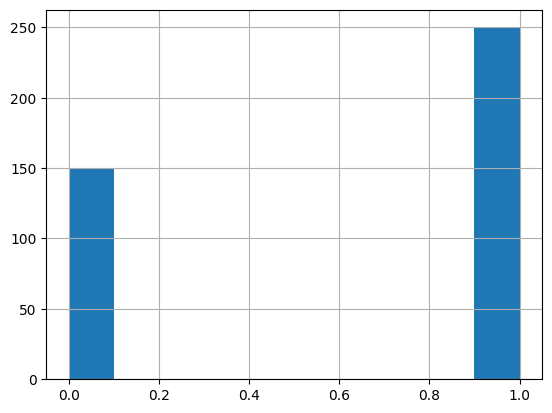

In [38]:
df.classification.hist()

<Axes: >

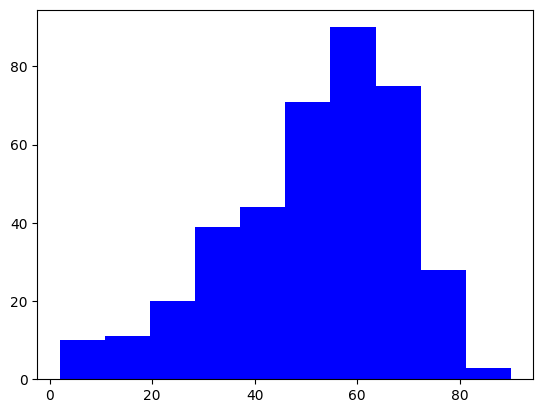

In [39]:
df.age.hist(color='blue', grid=False)


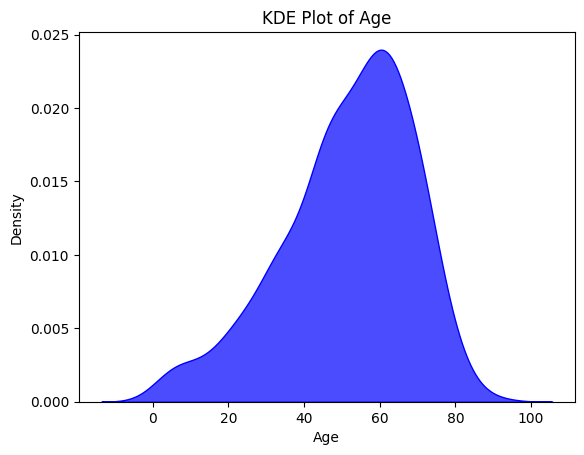

In [40]:
sns.kdeplot(df.age, fill=True, color='blue', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age')

plt.show()

Bivariate

In [41]:
data1=df.dropna(axis=0)
from scipy import stats
r, p = stats.pearsonr(data1.al, data1.hemo)

In [42]:
r,p

(-0.7847450275727732, 3.173554328229146e-34)

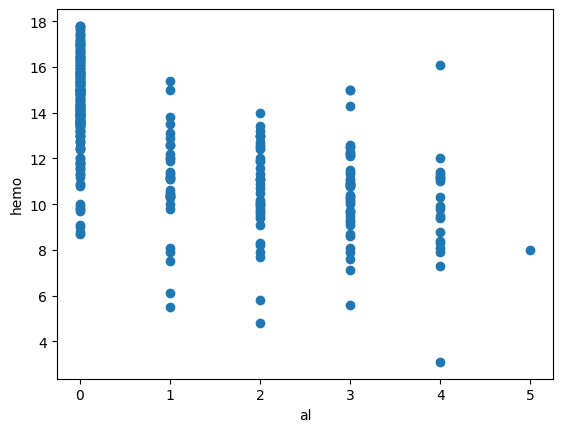

In [43]:
plt.scatter(df.al, df.hemo)

plt.xlabel('al')
plt.ylabel('hemo')
plt.show()

In [44]:
data.corr()

age        bp        sg        al        su       rbc  \
age             1.000000  0.079712 -0.277303  0.253380  0.207711 -0.147971   
bp              0.079712  1.000000 -0.198897  0.322507  0.243828 -0.316670   
sg             -0.277303 -0.198897  1.000000 -0.712331 -0.448477  0.500494   
al              0.253380  0.322507 -0.712331  1.000000  0.521448 -0.489941   
su              0.207711  0.243828 -0.448477  0.521448  1.000000 -0.256568   
rbc            -0.147971 -0.316670  0.500494 -0.489941 -0.256568  1.000000   
pc             -0.188907 -0.179834  0.630323 -0.752956 -0.335901  0.498959   
pcc             0.124032  0.206507 -0.460050  0.503341  0.177327 -0.168592   
ba              0.068353  0.174555 -0.516392  0.516104  0.381929 -0.273177   
bgr             0.301915  0.190113 -0.544781  0.518123  0.730050 -0.493857   
bu              0.190636  0.316287 -0.545319  0.661940  0.312259 -0.378478   
sc              0.189721  0.386551 -0.563122  0.702889  0.347196 -0.410408   
sod            -0.102933 -0.224710  0.539285 -0.599334 -0.242491  0.344916   
pot             0.006866  0.127801 -0.075057  0.209492  0.271954  0.019319   
hemo           -0.245645 -0.282365  0.682086 -0.784745 -0.385511  0.452566   
pcv            -0.224766 -0.313242  0.634009 -0.717364 -0.378747  0.447349   
wc             -0.130596  0.005469  0.289477 -0.241334 -0.062776  0.195704   
rc             -0.255283 -0.247835  0.629149 -0.660120 -0.381487  0.383699   
htn             0.372348  0.334951 -0.648168  0.796876  0.577286 -0.442400   
dm              0.323957  0.218096 -0.639391  0.678582  0.591010 -0.511777   
cad             0.269868  0.257709 -0.379305  0.374755  0.466658 -0.293269   
appet           0.170259  0.145047 -0.523944  0.578080  0.220547 -0.418639   
pe              0.232327  0.117878 -0.633622  0.622268  0.374128 -0.282868   
ane             0.105809  0.311097 -0.413252  0.569529  0.179811 -0.209797   
classification  0.305119  0.326567 -0.790102  0.925816  0.510615 -0.586391   

                      pc       pcc        ba       bgr  ...       pcv  \
age            -0.188907  0.124032  0.068353  0.301915  ... -0.224766   
bp             -0.179834  0.206507  0.174555  0.190113  ... -0.313242   
sg              0.630323 -0.460050 -0.516392 -0.544781  ...  0.634009   
al             -0.752956  0.503341  0.516104  0.518123  ... -0.717364   
su             -0.335901  0.177327  0.381929  0.730050  ... -0.378747   
rbc             0.498959 -0.168592 -0.273177 -0.493857  ...  0.447349   
pc              1.000000 -0.600092 -0.481227 -0.430646  ...  0.665846   
pcc            -0.600092  1.000000  0.415033  0.257768  ... -0.436269   
ba             -0.481227  0.415033  1.000000  0.318095  ... -0.411644   
bgr            -0.430646  0.257768  0.318095  1.000000  ... -0.433909   
bu             -0.613318  0.366726  0.205351  0.326496  ... -0.540654   
sc             -0.588517  0.361965  0.229238  0.331284  ... -0.622432   
sod             0.520324 -0.473954 -0.221374 -0.284968  ...  0.516201   
pot            -0.176150 -0.030297 -0.000279  0.102226  ... -0.198963   
hemo            0.733140 -0.531182 -0.410353 -0.434158  ...  0.751781   
pcv             0.665846 -0.436269 -0.411644 -0.433909  ...  1.000000   
wc              0.171335 -0.213087 -0.160107 -0.172519  ...  0.206737   
rc              0.664481 -0.496111 -0.346479 -0.425190  ...  0.679262   
htn            -0.666767  0.432876  0.314961  0.579407  ... -0.706630   
dm             -0.636288  0.321900  0.367477  0.663012  ... -0.598292   
cad            -0.384223  0.352255  0.297063  0.459164  ... -0.383839   
appet          -0.528435  0.432515  0.187815  0.338924  ... -0.551036   
pe             -0.606234  0.350171  0.393819  0.336141  ... -0.530981   
ane            -0.545380  0.485941  0.141344  0.139854  ... -0.571588   
classification -0.775388  0.509915  0.468845  0.591217  ... -0.794620   

                      wc        rc       htn        dm       cad     appet  \
age            

In [45]:
df_sampled = df.sample(2)

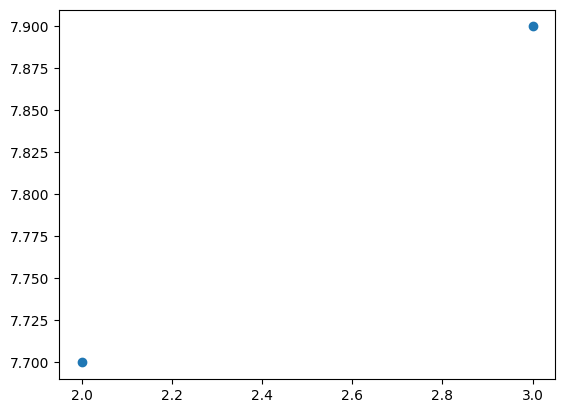

In [46]:
plt.scatter(df_sampled.al, df_sampled.hemo)

In [47]:
df_ckd = data[data['classification']== 1]
df_nonckd = data[data['classification']== 0]

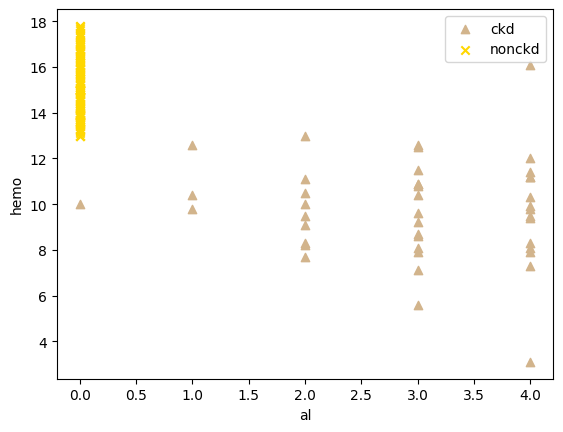

In [48]:
plt.scatter(df_ckd.al, df_ckd.hemo, marker='^', color='tan', label='ckd')
plt.scatter(df_nonckd.al, df_nonckd.hemo, marker='x', color='gold', label='nonckd')

plt.legend()
plt.xlabel('al')
plt.ylabel('hemo')
plt.show()

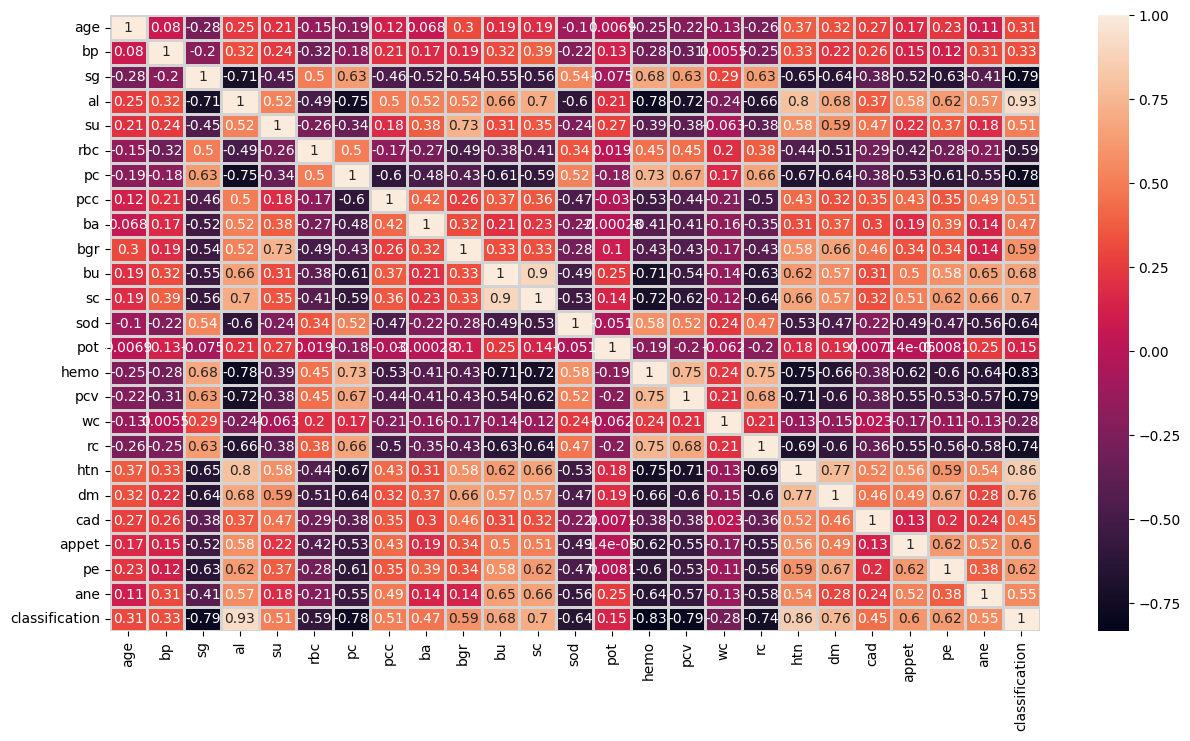

In [49]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, linewidth=2, linecolor = 'lightgray')
plt.show()

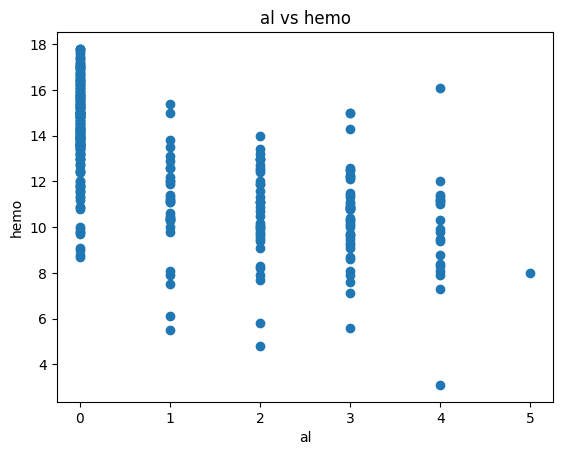

In [50]:
plt.scatter(df.al, df.hemo)

plt.title('al vs hemo')
plt.xlabel('al')
plt.ylabel('hemo')
plt.show()

In [51]:
stats.linregress(df.al, df.hemo)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

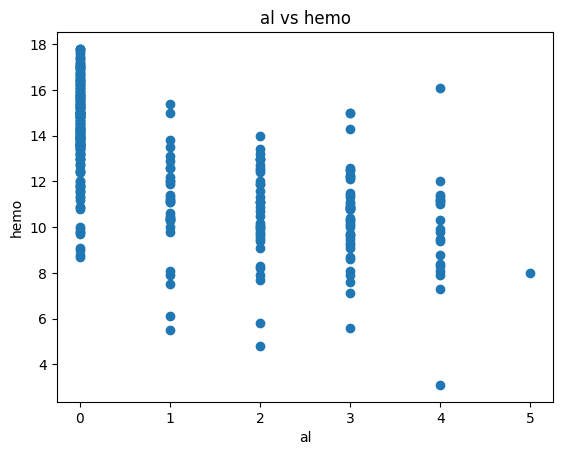

In [52]:
m, b, r, p, err = stats.linregress(df.al, df.hemo)

x = range(15, 53)
y = m * x + b

plt.plot(x, y, color='black')
plt.scatter(df.al, df.hemo)

plt.title('al vs hemo')
plt.xlabel('al')
plt.ylabel('hemo')
plt.show()